In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_blobs

In [2]:
 X, y = make_blobs(n_samples=100, n_features=2, centers=2,random_state=42, cluster_std=5.)

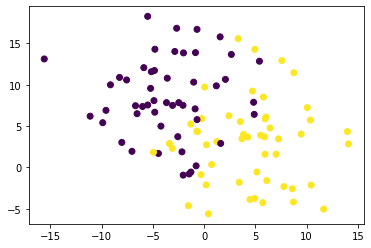

In [3]:
plt.scatter(*X.T, c=y)

In [4]:
from sklearn.svm import SVC

In [5]:
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact

In [6]:
import sys

In [7]:
sys.setrecursionlimit(1500)


In [8]:
@interact
def svv(C=(0.01, 15, 0.1), kernel=['rbf', 'poly', 'linear', 'sigmoid'], coef0=(0.0, 3, 0.1), gamma=["scale","auto"]):
    classifier = SVC(C=C, gamma=gamma, kernel=kernel, coef0=coef0)
    classifier.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(X.T[0].min(), X.T[0].max(), 300), np.linspace(X.T[1].min(), X.T[1].max(), 300))
    xrange = np.array([xx.ravel(), yy.ravel()]).T
    plt.contourf(xx, yy, classifier.predict(xrange).reshape(xx.shape))
    plt.scatter(*X.T, c=y, edgecolors='black')

interactive(children=(FloatSlider(value=7.41, description='C', max=15.0, min=0.01), Dropdown(description='kern…

In [10]:
@interact
def svv(C=(0.01, 15, 0.1), kernel=['rbf', 'poly', 'linear', 'sigmoid'], coef0=(0.,2.,0.1), gamma=["scale","auto"]):
    classifier = SVC(C=C, gamma=gamma, kernel=kernel, coef0=coef0)
  
    classifier.fit(X, y)
    xx, yy = np.meshgrid(*[np.linspace(X.T[i].min(), X.T[i].max(), 300) for i in range(2)])
       
    xrange = np.array([xx.ravel(), yy.ravel()]).T
    plt.contourf(xx, yy, classifier.predict(xrange).reshape(xx.shape), alpha=0.5)
    plt.scatter(*X.T, c=y, edgecolors='black')

   

interactive(children=(FloatSlider(value=7.41, description='C', max=15.0, min=0.01), Dropdown(description='kern…

In [13]:
y.shape

(100,)

In [11]:
from sklearn.model_selection import train_test_split, cross_validate

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42, test_size=10)

In [14]:
classifier = SVC()
ys = StandardScaler().fit_transform(y_train.reshape(-1, 1))
classifier.fit(X_train, ys)

c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'